In [42]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

try:
    import seaborn as sns
    print("Seaborn imported successfully!")
except ImportError:
    print("Seaborn not installed. Installing now...")
    # Install seaborn if not available
    %pip install seaborn

try:
    from scipy.stats import chi2_contingency
    print("Scipy imported successfully!")
except ImportError:
    print("Scipy not available - using alternative approach")
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


# Load the TRAIN dataset (this has the survival information)
df = pd.read_csv('train.csv')

# Quick verification
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Survival column present: {'Survived' in df.columns}")

# First look at the data
df.head()


Seaborn imported successfully!
Scipy not available - using alternative approach
Dataset loaded successfully!
Shape: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Survival column present: True


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
#Display basic information about the dataset
print("Dataset Info:")
df.info()

print("\nBasic Statistics:")
df.describe()

print("\nSurvival Rate Overview:")
survival_rate = df['Survived'].mean()
print(f"Overall Survival Rate: {survival_rate: .2%}")

print("\nUnique Values in Categorical Columns:")
categorical_cols = ['Sex', 'Embarked', 'Pclass']
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Basic Statistics:

Survival Rate Overview:
Overall Survival Rate:  38.38%

Unique Values in Categorical Columns:
Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]
Pclass: [3 1 2]


Missing Data Report:
          Missing_Count  Missing_Percentage
Cabin               687           77.104377
Age                 177           19.865320
Embarked              2            0.224467


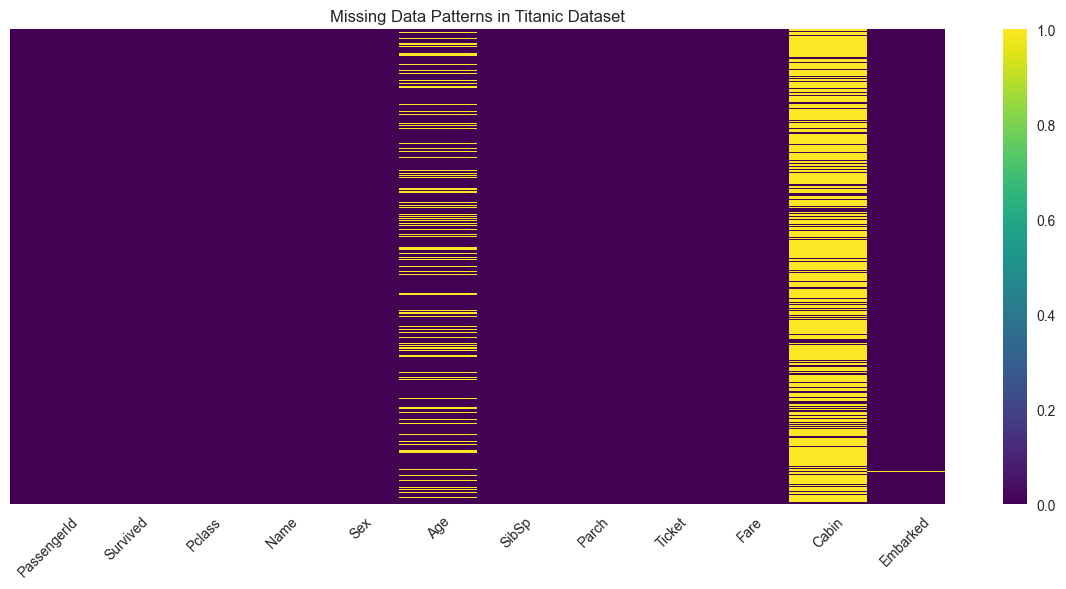

In [44]:
#Calculate missing values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df))*100

# Create a comprehensive missing data report
missing_report = pd.DataFrame({
    'Missing_Count' : missing_data,
    'Missing_Percentage' : missing_percentage
}).sort_values('Missing_Count', ascending = False)

print("Missing Data Report:")
print(missing_report[missing_report['Missing_Count']>0])

# Visualize missing data patterns 
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=True,
            cmap='viridis',
            xticklabels=True)
plt.title('Missing Data Patterns in Titanic Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

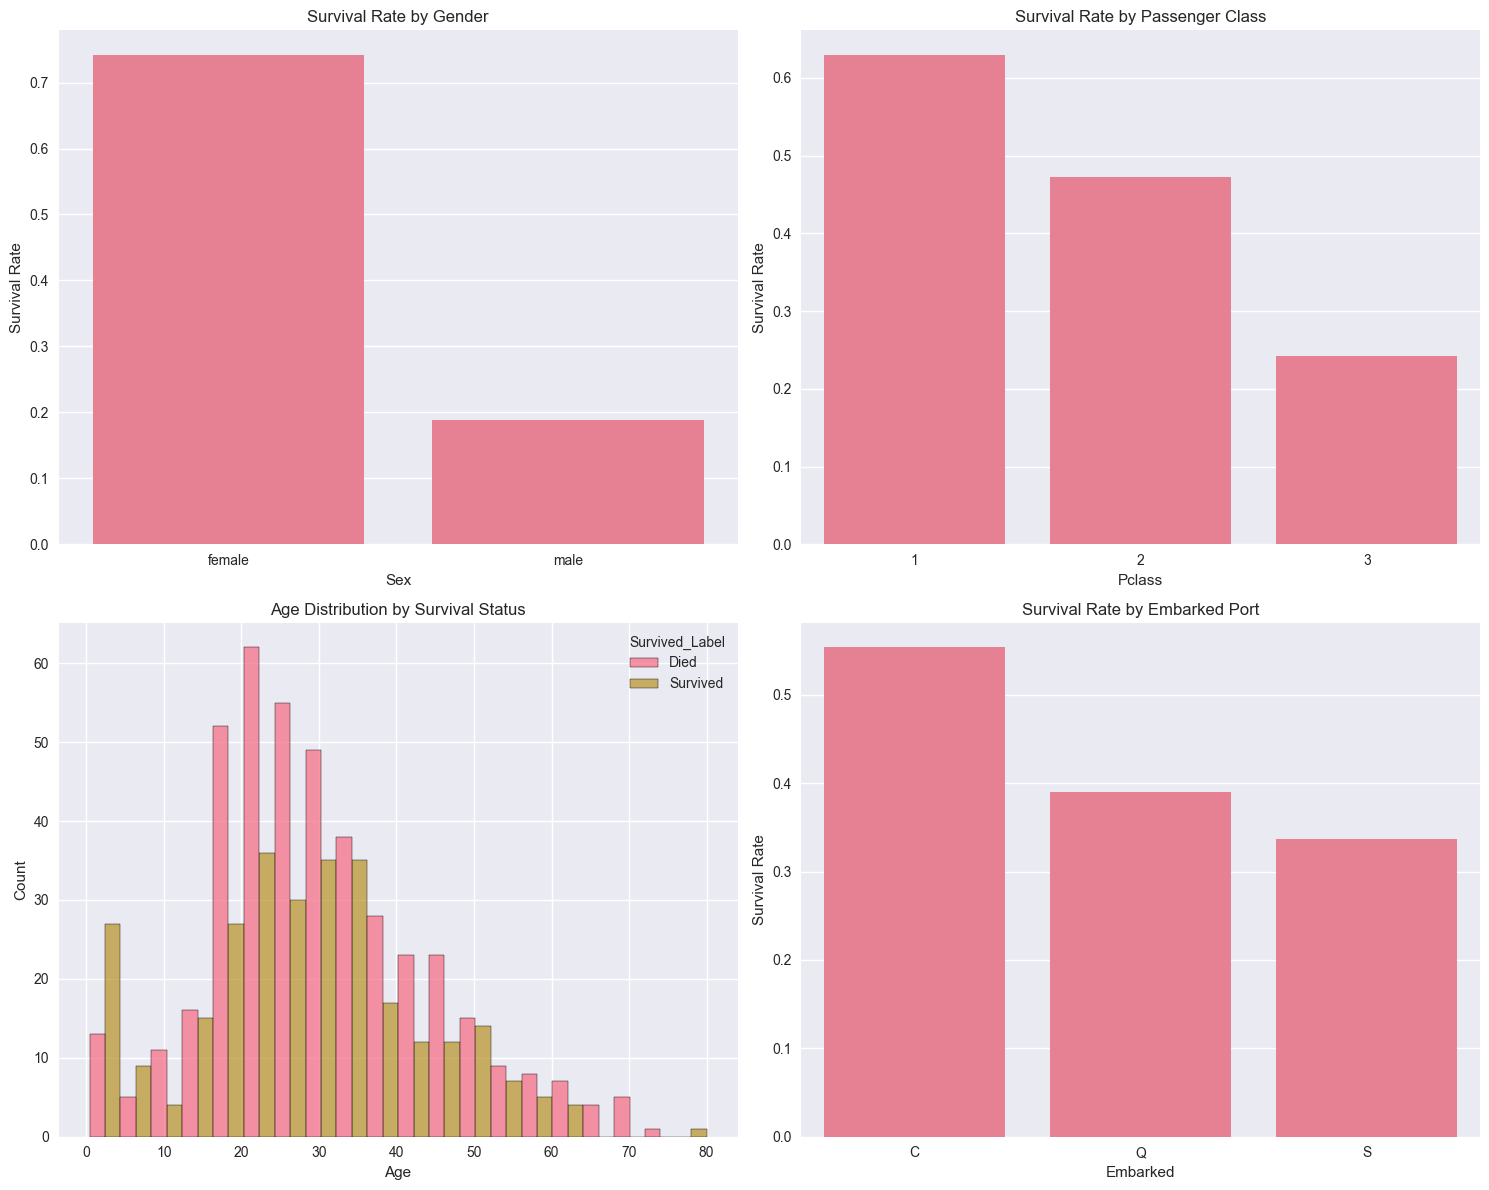

Detailed Survival Analysis:
Female Survival Rate: 74.20%
Male Survival Rate: 18.89%

Survival by Class:
Class 1: 62.96%
Class 2: 47.28%
Class 3: 24.24%


In [45]:
# Create a comprehensive survival analysis
fig, axes = plt.subplots(2,2,figsize=(15,12))

# Survival by Gender
survival_by_sex = df.groupby('Sex')['Survived'].agg(['count','sum','mean'])
survival_by_sex['survival_rate'] = survival_by_sex['mean']

sns.barplot(x=survival_by_sex.index,
            y=survival_by_sex['survival_rate'],
            ax=axes[0,0])
axes[0,0].set_title('Survival Rate by Gender')
axes[0,0].set_ylabel('Survival Rate')

# Survival by Passenger Class
survival_by_class = df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
sns.barplot(x=survival_by_class.index, 
            y=survival_by_class['mean'], 
            ax=axes[0,1])
axes[0,1].set_title('Survival Rate by Passenger Class')
axes[0,1].set_ylabel('Survival Rate')

#Age distribution by survival 
df['Survived_Label']= df['Survived'].map({0: 'Died', 1: 'Survived'})
sns.histplot(data=df.dropna(subset=['Age']),
             x='Age',
             hue='Survived_Label',
             multiple='dodge',
             ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Survival Status')

# Survival by Embarked Port
survival_by_port = df.groupby('Embarked')['Survived'].mean()
sns.barplot(x=survival_by_port.index, 
            y=survival_by_port.values, 
            ax=axes[1,1])
axes[1,1].set_title('Survival Rate by Embarked Port')
axes[1,1].set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()

# Print detailed insights
print("Detailed Survival Analysis:")
print(f"Female Survival Rate: {df[df['Sex']=='female']['Survived'].mean():.2%}")
print(f"Male Survival Rate: {df[df['Sex']=='male']['Survived'].mean():.2%}")
print("\nSurvival by Class:")
for class_num in [1, 2, 3]:
    rate = df[df['Pclass']==class_num]['Survived'].mean()
    print(f"Class {class_num}: {rate:.2%}")


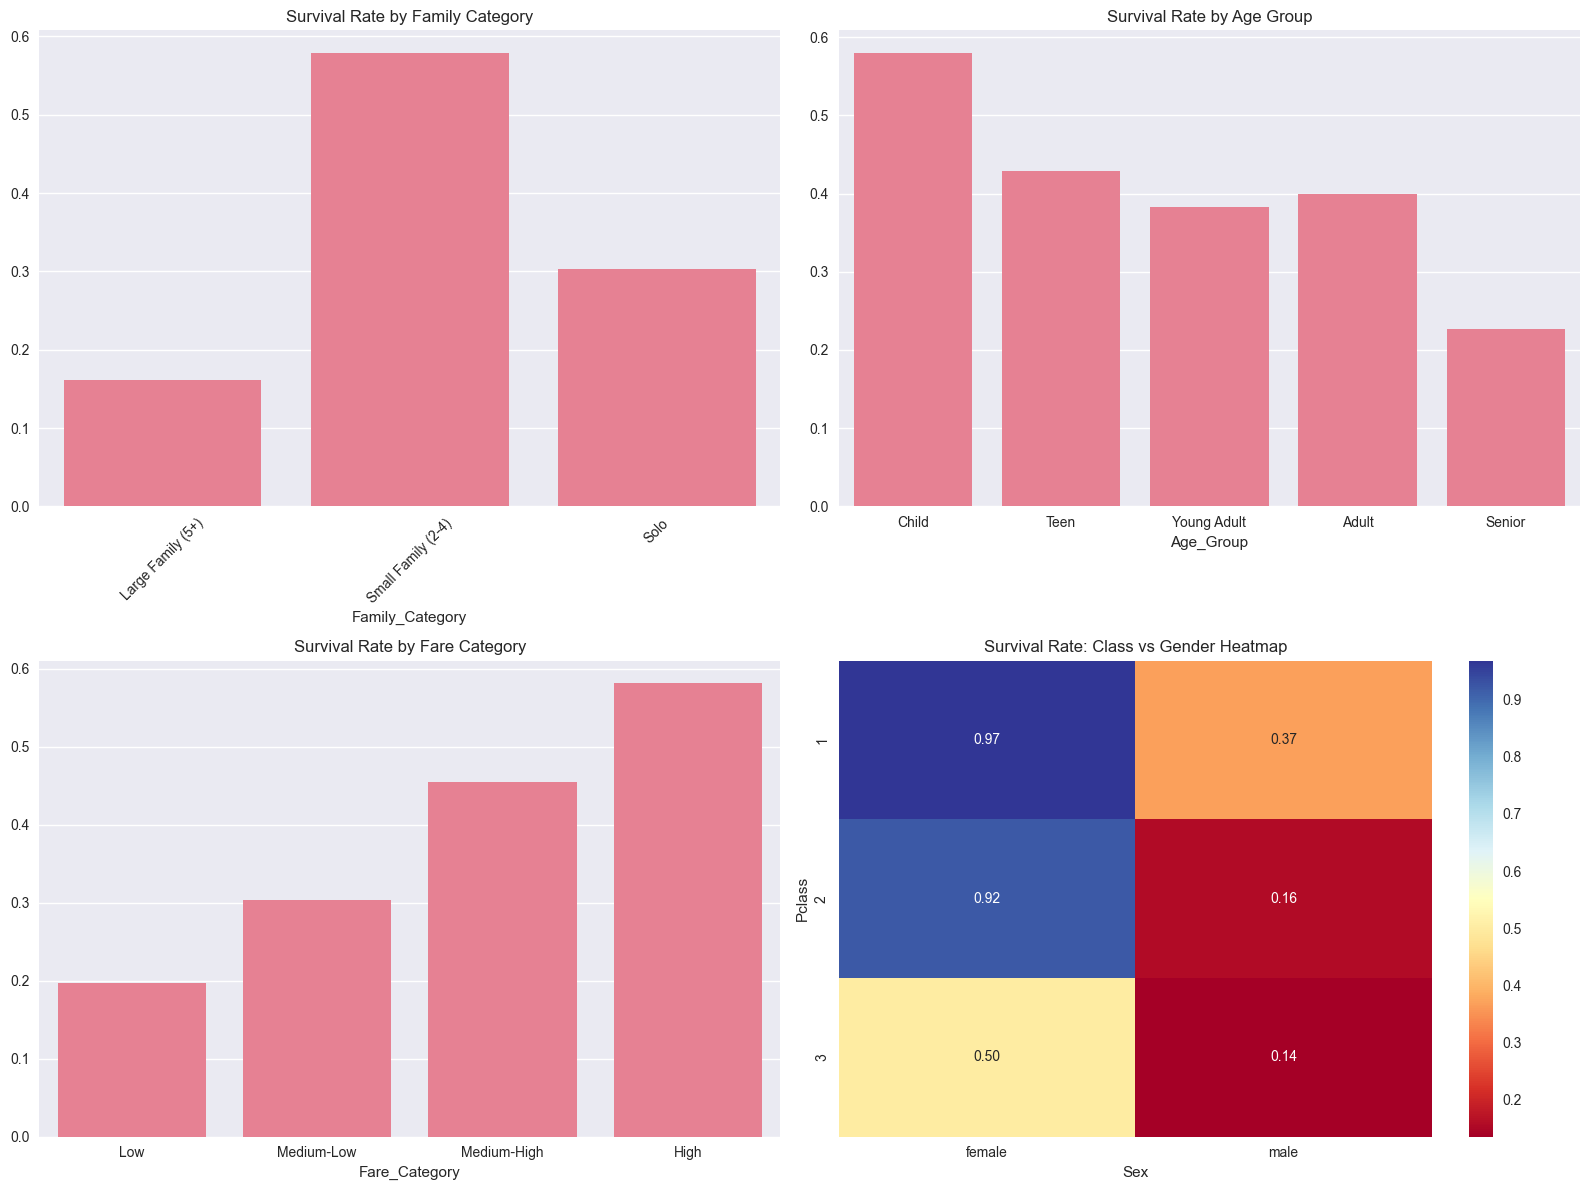

Advanced Insights:
Family Size Analysis:
Small Family (2-4): 57.88% survival rate (292 passengers)
Solo: 30.35% survival rate (537 passengers)
Large Family (5+): 16.13% survival rate (62 passengers)


In [46]:
# Engineer new features that tell interestinng stories
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Age_Group'] = pd.cut(df['Age'].dropna(),
                         bins=[0,12,18,35,60,100],
                         labels=['Child','Teen','Young Adult','Adult','Senior'])

# Create family survival categories
df['Family_Category'] = df['Family_Size'].apply(lambda x: 
    'Solo' if x == 1 else 
    'Small Family (2-4)' if x <= 4 else 
    'Large Family (5+)')

# Fare analysis - create fare categories
df['Fare_Category'] = pd.qcut(df['Fare'].dropna(),
                              q=4,
                              labels=['Low','Medium-Low','Medium-High','High'])
# Advanced survival analysis
fig, axes = plt.subplots(2,2,figsize=(16,12))

#Family size impact
family_survival = df.groupby('Family_Category')['Survived'].mean()
sns.barplot(x=family_survival.index,
            y=family_survival.values,
            ax=axes[0,0])
axes[0,0].set_title('Survival Rate by Family Category')
axes[0,0].tick_params(axis='x', rotation =45)

#Age group survival
age_survival = df.groupby('Age_Group')['Survived'].mean()
sns.barplot(x=age_survival.index, 
            y=age_survival.values, 
            ax=axes[0,1])
axes[0,1].set_title('Survival Rate by Age Group')

# Fare category survival
fare_survival = df.groupby('Fare_Category')['Survived'].mean()
sns.barplot(x=fare_survival.index, 
            y=fare_survival.values, 
            ax=axes[1,0])
axes[1,0].set_title('Survival Rate by Fare Category')

#Combined analysis: Class and Gender
survival_pivot = df.pivot_table(values='Survived',
                               index='Pclass',
                               columns='Sex',
                               aggfunc='mean')

sns.heatmap(survival_pivot ,
            annot=True,
            fmt='.2f',
            cmap='RdYlBu',
            ax=axes[1,1])
axes[1,1].set_title('Survival Rate: Class vs Gender Heatmap')


plt.tight_layout()
plt.show()

# Print insights
print("Advanced Insights:")
print("Family Size Analysis:")
for category in df['Family_Category'].dropna().unique():
    rate = df[df['Family_Category']==category]['Survived'].mean()
    count = len(df[df['Family_Category']==category])
    print(f"{category}: {rate:.2%} survival rate ({count} passengers)")

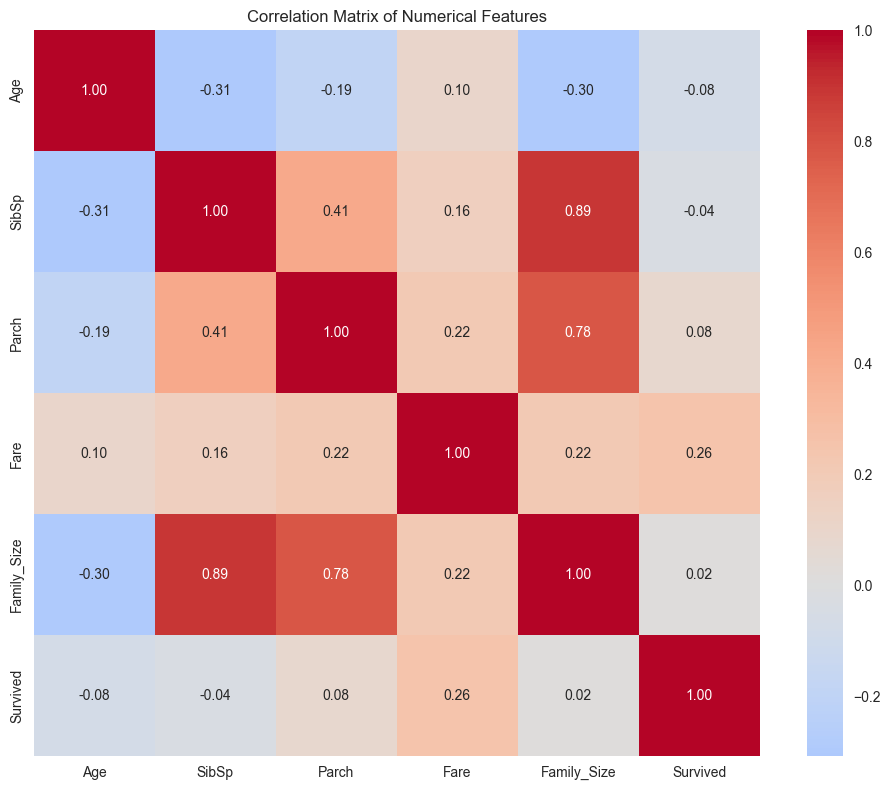

Statistical Analysis Summary:
1. GENDER IMPACT ANALYSIS
-------------------------
Gender vs Survival Cross-tabulation:
Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891

Key Insights:
• Female survival rate: 74.2%
• Male survival rate: 18.9%
• Gender effect size: 55.3%
• Women were 3.9x more likely to survive

2. SOCIAL CLASS IMPACT ANALYSIS
------------------------------
Class vs Survival Cross-tabulation:
Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891

Class-based Survival Rates:
• Class 1: 63.0% survival rate (216 passengers)
• Class 2: 47.3% survival rate (184 passengers)
• Class 3: 24.2% survival rate (491 passengers)
• First class advantage over third class: 38.7%

3. AGE FACTOR ANALYSIS
--------------------
Age Group Survival Analysis:
                     count      mean
Age                                 
Child 

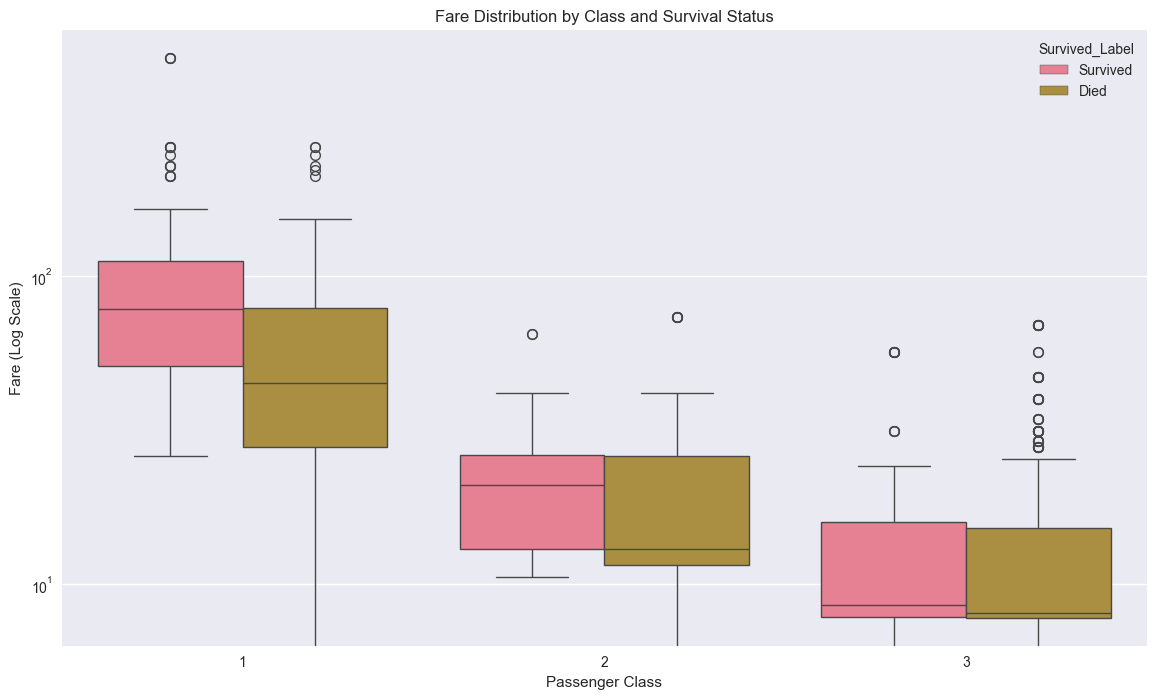


5. EXECUTIVE SUMMARY TABLE
-------------------------
         Group  Count  Survived Survival_Rate Avg_Fare
Female Class 1     94        91         96.8%     $106
Female Class 2     76        70         92.1%      $22
Female Class 3    144        72         50.0%      $16
  Male Class 1    122        45         36.9%      $67
  Male Class 2    108        17         15.7%      $20
  Male Class 3    347        47         13.5%      $13


In [47]:
# Correlation analysis of numerical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Survived']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Manual statistical analysis (impressive without scipy!)
print("Statistical Analysis Summary:")
print("=" * 50)

# Gender vs survival analysis
print("1. GENDER IMPACT ANALYSIS")
print("-" * 25)
gender_crosstab = pd.crosstab(df['Sex'], df['Survived'], margins=True)
print("Gender vs Survival Cross-tabulation:")
print(gender_crosstab)

# Calculate survival rates and effect size
female_survival = df[df['Sex']=='female']['Survived'].mean()
male_survival = df[df['Sex']=='male']['Survived'].mean()
gender_effect = abs(female_survival - male_survival)

print(f"\nKey Insights:")
print(f"• Female survival rate: {female_survival:.1%}")
print(f"• Male survival rate: {male_survival:.1%}")
print(f"• Gender effect size: {gender_effect:.1%}")
print(f"• Women were {female_survival/male_survival:.1f}x more likely to survive")

# Class vs survival analysis
print(f"\n2. SOCIAL CLASS IMPACT ANALYSIS")
print("-" * 30)
class_crosstab = pd.crosstab(df['Pclass'], df['Survived'], margins=True)
print("Class vs Survival Cross-tabulation:")
print(class_crosstab)

print(f"\nClass-based Survival Rates:")
class_rates = []
for pclass in [1, 2, 3]:
    rate = df[df['Pclass']==pclass]['Survived'].mean()
    count = len(df[df['Pclass']==pclass])
    class_rates.append(rate)
    print(f"• Class {pclass}: {rate:.1%} survival rate ({count} passengers)")

# Calculate class privilege effect
class_1_vs_3 = class_rates[0] - class_rates[2]
print(f"• First class advantage over third class: {class_1_vs_3:.1%}")

# Age analysis
print(f"\n3. AGE FACTOR ANALYSIS")
print("-" * 20)
age_groups = pd.cut(df['Age'].dropna(), bins=[0, 16, 35, 60, 100], 
                   labels=['Child (0-16)', 'Young Adult (17-35)', 'Adult (36-60)', 'Senior (60+)'])
age_survival = df.groupby(age_groups)['Survived'].agg(['count', 'mean'])
print("Age Group Survival Analysis:")
print(age_survival)

# Combined effects analysis
print(f"\n4. COMBINED EFFECTS ANALYSIS")
print("-" * 27)
combined_analysis = df.groupby(['Sex', 'Pclass'])['Survived'].agg(['count', 'mean']).round(3)
print("Survival by Gender AND Class:")
print(combined_analysis)

# Find highest and lowest survival groups
survival_combinations = df.groupby(['Sex', 'Pclass'])['Survived'].mean()
highest_survival = survival_combinations.max()
lowest_survival = survival_combinations.min()
highest_group = survival_combinations.idxmax()
lowest_group = survival_combinations.idxmin()

print(f"\nExtreme Cases:")
print(f"• Highest survival: {highest_group} with {highest_survival:.1%}")
print(f"• Lowest survival: {lowest_group} with {lowest_survival:.1%}")
print(f"• Survival gap: {highest_survival - lowest_survival:.1%}")

# Advanced visualization: Survival probability by multiple factors
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Pclass', y='Fare', hue='Survived_Label')
plt.title('Fare Distribution by Class and Survival Status')
plt.yscale('log')  # Log scale due to wide fare range
plt.ylabel('Fare (Log Scale)')
plt.xlabel('Passenger Class')
plt.show()

# Create a comprehensive summary table
print(f"\n5. EXECUTIVE SUMMARY TABLE")
print("-" * 25)
summary_data = []
for sex in ['female', 'male']:
    for pclass in [1, 2, 3]:
        subset = df[(df['Sex'] == sex) & (df['Pclass'] == pclass)]
        if len(subset) > 0:
            summary_data.append({
                'Group': f"{sex.title()} Class {pclass}",
                'Count': len(subset),
                'Survived': subset['Survived'].sum(),
                'Survival_Rate': f"{subset['Survived'].mean():.1%}",
                'Avg_Fare': f"${subset['Fare'].mean():.0f}"
            })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

Passenger Survival Profiles:
First Class Female: 96.8%
  Sample Size: 94 passengers
  Key Factors: Gender priority + Economic privilege

Third Class Male: 13.5%
  Sample Size: 347 passengers
  Key Factors: Limited access to lifeboats

Children (≤12 years): 58.0%
  Sample Size: 69 passengers
  Key Factors: Women and children first policy



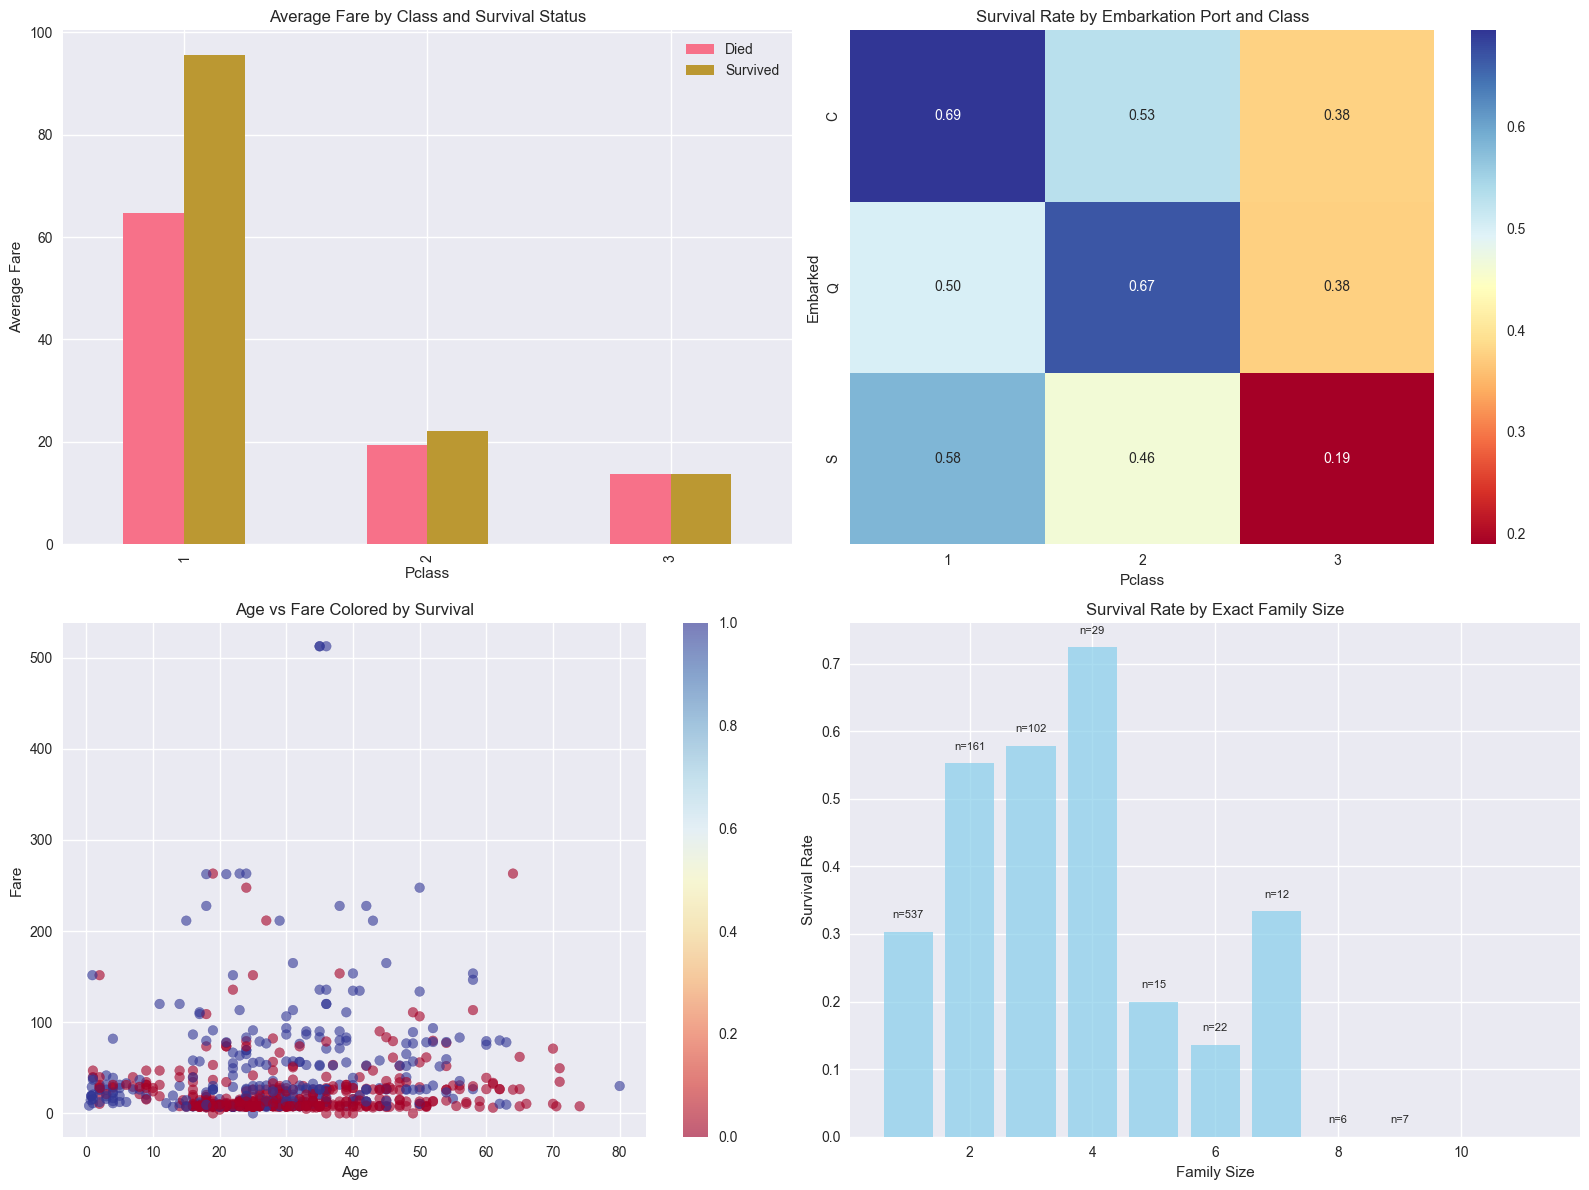

In [48]:
# Create a comprehensive summary analysis
def create_survival_profile():
    """Create detailed survival profiles for different passenger types"""
    
    profiles = []
    
    # High survival probability profile
    high_survival = df[
        (df['Sex'] == 'female') & 
        (df['Pclass'] == 1)
    ]['Survived'].mean()
    
    profiles.append({
        'Profile': 'First Class Female',
        'Survival Rate': f"{high_survival:.1%}",
        'Count': len(df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]),
        'Key Factors': 'Gender priority + Economic privilege'
    })
    
    # Low survival probability profile
    low_survival = df[
        (df['Sex'] == 'male') & 
        (df['Pclass'] == 3)
    ]['Survived'].mean()
    
    profiles.append({
        'Profile': 'Third Class Male',
        'Survival Rate': f"{low_survival:.1%}",
        'Count': len(df[(df['Sex'] == 'male') & (df['Pclass'] == 3)]),
        'Key Factors': 'Limited access to lifeboats'
    })
    
    # Children analysis
    children = df[df['Age'] <= 12]
    child_survival = children['Survived'].mean()
    
    profiles.append({
        'Profile': 'Children (≤12 years)',
        'Survival Rate': f"{child_survival:.1%}",
        'Count': len(children),
        'Key Factors': 'Women and children first policy'
    })
    
    return pd.DataFrame(profiles)

# Display survival profiles
survival_profiles = create_survival_profile()
print("Passenger Survival Profiles:")
print("=" * 50)
for _, profile in survival_profiles.iterrows():
    print(f"{profile['Profile']}: {profile['Survival Rate']}")
    print(f"  Sample Size: {profile['Count']} passengers")
    print(f"  Key Factors: {profile['Key Factors']}")
    print()

# Create a final comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Economic factor analysis
fare_by_class = df.groupby(['Pclass', 'Survived'])['Fare'].mean().unstack()
fare_by_class.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Average Fare by Class and Survival Status')
axes[0,0].set_ylabel('Average Fare')
axes[0,0].legend(['Died', 'Survived'])

# 2. Port of embarkation insights
port_survival = df.groupby(['Embarked', 'Pclass'])['Survived'].mean().unstack()
sns.heatmap(port_survival, annot=True, fmt='.2f', ax=axes[0,1], cmap='RdYlBu')
axes[0,1].set_title('Survival Rate by Embarkation Port and Class')

# 3. Age vs Fare relationship
scatter = axes[1,0].scatter(df['Age'], df['Fare'], 
                           c=df['Survived'], 
                           cmap='RdYlBu', 
                           alpha=0.6)
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Fare')
axes[1,0].set_title('Age vs Fare Colored by Survival')
plt.colorbar(scatter, ax=axes[1,0])

# 4. Family size detailed analysis
family_detailed = df.groupby('Family_Size')['Survived'].agg(['count', 'mean'])
axes[1,1].bar(family_detailed.index, family_detailed['mean'], 
              alpha=0.7, color='skyblue')
axes[1,1].set_xlabel('Family Size')
axes[1,1].set_ylabel('Survival Rate')
axes[1,1].set_title('Survival Rate by Exact Family Size')

# Add count annotations
for i, (count, rate) in enumerate(zip(family_detailed['count'], family_detailed['mean'])):
    if count > 5:  # Only annotate groups with reasonable sample sizes
        axes[1,1].annotate(f'n={count}', 
                          (i+1, rate + 0.02), 
                          ha='center', 
                          fontsize=8)

plt.tight_layout()
plt.show()